In [115]:
import pandas as pd
drug = pd.read_csv('drug200.csv')

In [116]:
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [117]:
drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


Gender, blood pressure, and cholestrol are all not numerical

In [118]:
drug.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [119]:
y = drug.Drug
X = drug.drop('Drug', axis=1)

In [120]:
# One hot encode gender
X_copy = X.copy()

from sklearn.preprocessing import OneHotEncoder

OH = OneHotEncoder(handle_unknown='ignore', sparse=False)
gender = X_copy['Sex'].values.reshape(-1, 1)
gender = pd.DataFrame(OH.fit_transform(gender))

In [121]:
# Ordinal encode blood pressure and cholestrol
X_copy = X_copy.drop('Sex', axis=1)

from sklearn.preprocessing import OrdinalEncoder
ordinal = ['BP', 'Cholesterol']
encoder = OrdinalEncoder()
X_copy[ordinal] = encoder.fit_transform(X_copy[ordinal])

In [122]:
# join together
X = pd.concat([gender, X_copy], axis=1)

In [123]:
X.head()

,0,1,Age,BP,Cholesterol,Na_to_K
0,1.0,0.0,23,0.0,0.0,25.355
1,0.0,1.0,47,1.0,0.0,13.093
2,0.0,1.0,47,1.0,0.0,10.114
3,1.0,0.0,28,2.0,0.0,7.798
4,1.0,0.0,61,1.0,0.0,18.043


In [124]:
y.head()

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

In [125]:
yNew = y.copy().values.reshape(-1,1)
y = pd.DataFrame(OH.fit_transform(yNew))

In [126]:
y.head()

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0


In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=256)

In [128]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, BatchNormalization
from tensorflow.keras.activations import sigmoid, softmax

model = Sequential()
model.add(BatchNormalization(input_dim=6))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation='softmax'))

In [129]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_5 (Batch (None, 6)                 24        
_________________________________________________________________
dense_16 (Dense)             (None, 512)               3584      
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)              

In [130]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [131]:
from tensorflow.keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(min_delta=0.001, patience=15, restore_best_weights=True)

In [132]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[earlystopping], batch_size=256, epochs=500, verbose=1)

Epoch 1/500
1/1 [==============================] - 0s 449ms/step - loss: 1.6247 - accuracy: 0.1333 - val_loss: 2.6684 - val_accuracy: 0.4000
Epoch 2/500
1/1 [==============================] - 0s 20ms/step - loss: 1.4324 - accuracy: 0.5067 - val_loss: 3.9136 - val_accuracy: 0.4000
Epoch 3/500
1/1 [==============================] - 0s 22ms/step - loss: 1.2656 - accuracy: 0.5133 - val_loss: 5.1404 - val_accuracy: 0.4000
Epoch 4/500
1/1 [==============================] - 0s 21ms/step - loss: 1.1585 - accuracy: 0.5000 - val_loss: 6.2100 - val_accuracy: 0.4000
Epoch 5/500
1/1 [==============================] - 0s 23ms/step - loss: 1.1074 - accuracy: 0.5333 - val_loss: 6.8919 - val_accuracy: 0.4000
Epoch 6/500
1/1 [==============================] - 0s 21ms/step - loss: 1.0148 - accuracy: 0.6333 - val_loss: 7.2049 - val_accuracy: 0.4000
Epoch 7/500
1/1 [==============================] - 0s 22ms/step - loss: 0.9112 - accuracy: 0.6533 - val_loss: 7.3693 - val_accuracy: 0.4000
Epoch 8/500
1/1 [==

In [133]:
history_df = pd.DataFrame(history.history)

<AxesSubplot:>

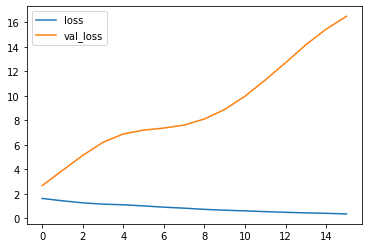

In [134]:
history_df.loc[:,['loss', 'val_loss']].plot()